In [1]:
from scipy.io import wavfile
fs, data = wavfile.read("single-2.wav")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data.shape

(2956, 2)

## Plot the two channels from the audio

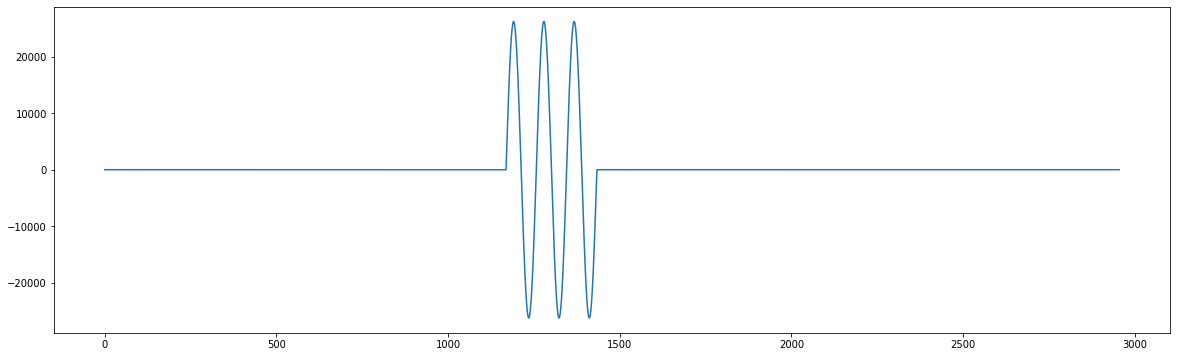

In [3]:
plt.figure(figsize=(20,6))
plt.plot(data[:,0])
plt.show()

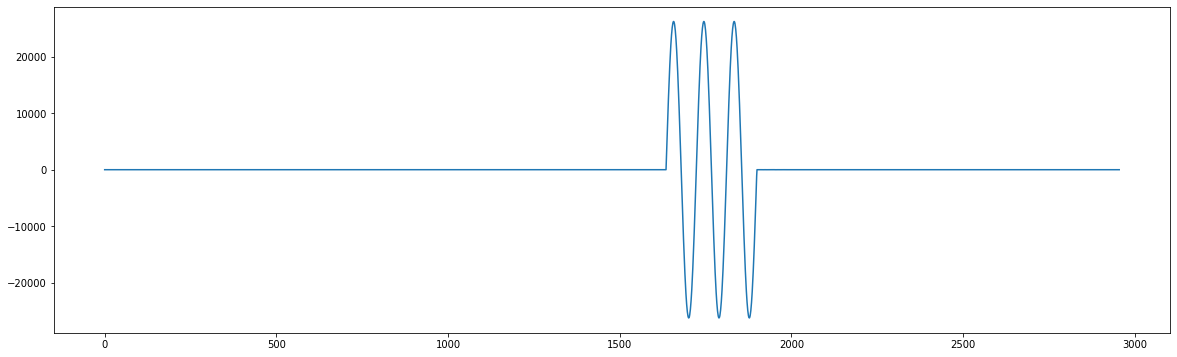

In [4]:
plt.figure(figsize=(20,6))
plt.plot(data[:,1])
plt.show()

In [5]:
fs

44100

In [6]:
from scipy.signal import correlate, convolve

In [7]:
import scipy
af = scipy.fft(data[:,0])
bf = scipy.fft(data[:,1])
c = scipy.ifft(af * scipy.conj(bf))

time_shift = np.argmax(abs(c))
print(time_shift)
print(abs(c).argsort()[-3:][::-1])

2490
[2490 2491 2489]


3772
time difference of arrival is (in secs):  0.01056689342403628


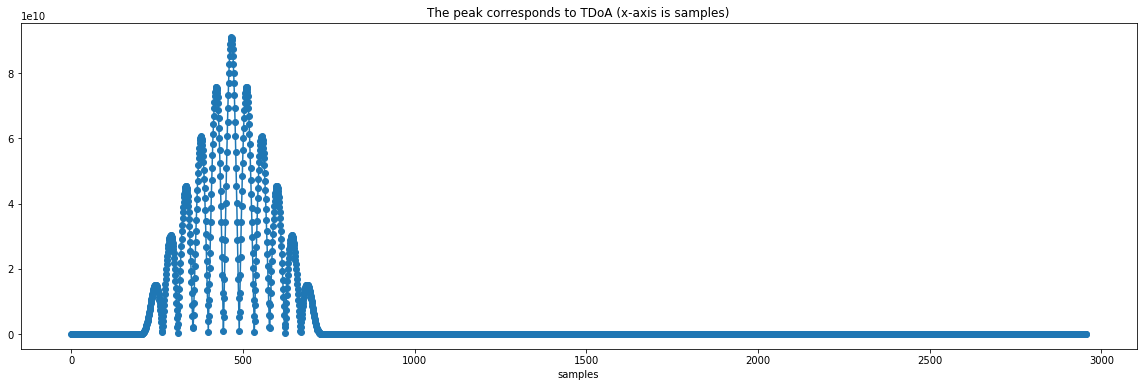

In [17]:
from scipy import signal, fftpack
corr = signal.correlate(data[:,0], data[:,1])
#print(data[:,0].shape)
#print(corr.shape)
#print(corr.argsort()[-3:][::-1])
print(np.argmax(corr))

A = fftpack.fft(data[:,0])
B = fftpack.fft(data[:,1])
Ar = -A.conjugate()
Br = -B.conjugate()

tdoa_samples = np.argmax(np.abs(fftpack.ifft(Ar*B)))
print('time difference of arrival is (in secs): ',tdoa_samples/fs)
#print(numpy.argmax(numpy.abs(fftpack.ifft(A*Br))))

plt.figure(figsize=(20,6))
plt.plot(np.abs(fftpack.ifft(Ar*B)), 'o-')
plt.title('The peak corresponds to TDoA (x-axis is samples)')
plt.xlabel('samples')
plt.show()

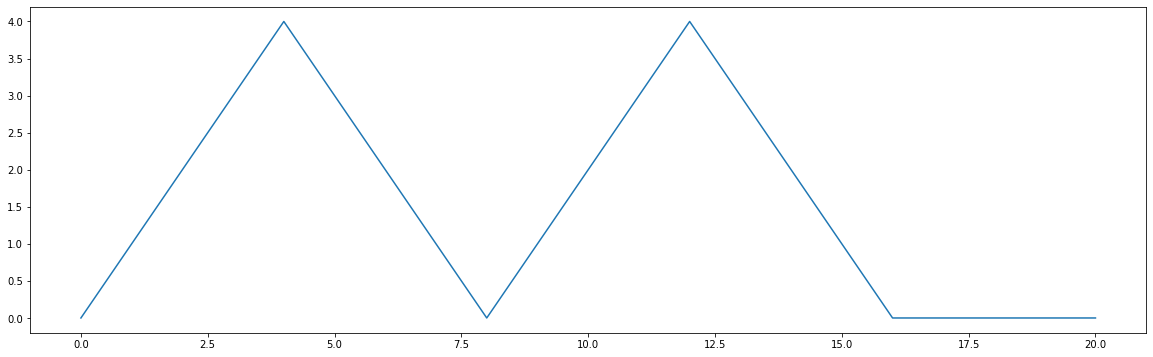

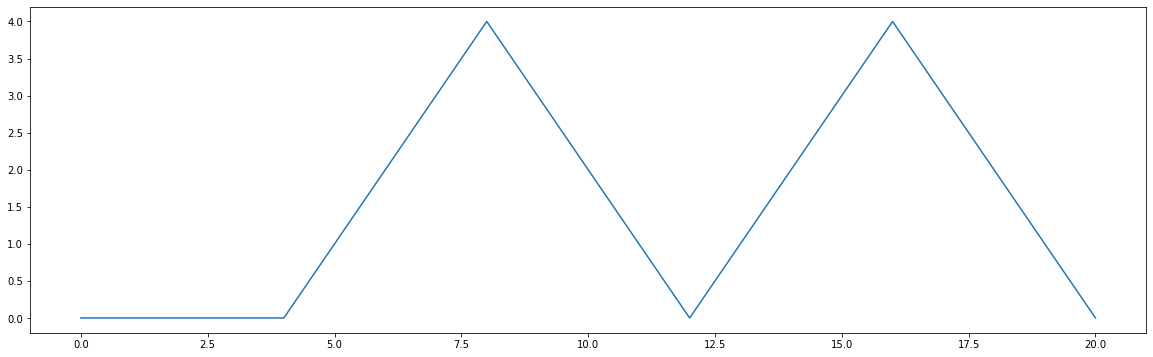

24


In [20]:
# another approach, synthetic data
from scipy import signal, fftpack
import numpy
a = numpy.array([0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 0, 0, 0, 0])
b = numpy.array([0, 0, 0, 0, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0])
plt.figure(figsize=(20,6))
plt.plot(a)
plt.show()
plt.figure(figsize=(20,6))
plt.plot(b)
plt.show()

print(numpy.argmax(signal.correlate(b,a)))

